In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [2]:
age=np.random.randint(1,121,size=100) ##The range of age is an approximate by myself to restrict the data to a sensible set of integers.
weight=np.random.randint(20,151,size=100) #The range of weights is an approximate by myself to restrict the data to a sensible set of integers.
sleep=np.random.randint(0,24,size=100)
income=np.random.randint(7,4500,size=100) #The lowest and highest income in dollars per hour was taken from the internet for better data.
drink=np.random.randint(1,6,size=100) 
gender=np.random.choice(["M","F"],size=100,replace=True)
sports=np.random.choice([1,2,3,4,5,9], size=100)
salt=np.random.choice([1,2,3,4,5,9],size=100)
hypertension=np.random.choice(["L","H","N"],size=100, replace=True)


attributes_class=[age,weight,sleep,income,drink,gender,sports,salt,hypertension]

df=pd.DataFrame(attributes_class).transpose()
df.columns=["Age","Weight(Kgs)","Sleep (hours)","Income ($ per hour)","Drink","Gender","Sports","Salt","Hypertension"]

df=pd.get_dummies(df,columns=["Gender"])

dummy1=df.copy()
dummy1.drop("Hypertension",axis=1, inplace=True)
X=dummy1
y=hypertension
print(y)
dummy1.head()


['L' 'N' 'L' 'H' 'H' 'L' 'L' 'N' 'L' 'N' 'N' 'L' 'N' 'L' 'L' 'N' 'H' 'N'
 'L' 'L' 'N' 'L' 'H' 'L' 'N' 'N' 'N' 'H' 'N' 'L' 'L' 'N' 'H' 'L' 'N' 'L'
 'L' 'H' 'L' 'N' 'H' 'N' 'H' 'L' 'L' 'L' 'L' 'H' 'N' 'N' 'H' 'N' 'L' 'N'
 'N' 'L' 'H' 'H' 'L' 'L' 'L' 'H' 'L' 'H' 'L' 'L' 'H' 'N' 'H' 'N' 'L' 'N'
 'H' 'L' 'H' 'L' 'N' 'N' 'L' 'L' 'H' 'L' 'N' 'N' 'H' 'L' 'L' 'L' 'L' 'L'
 'N' 'H' 'L' 'H' 'L' 'N' 'H' 'N' 'N' 'H']


,Age,Weight(Kgs),Sleep (hours),Income ($ per hour),Drink,Sports,Salt,Gender_F,Gender_M
0,112,106,9,130,1,9,2,0,1
1,93,130,13,3027,5,2,9,1,0
2,25,83,17,4070,2,2,3,0,1
3,57,66,6,1511,2,3,1,0,1
4,31,145,5,952,2,4,5,0,1


In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=45)
print("Training Split input- ", X_train.shape)
print("Testing Split input- ", X_test.shape)


Training Split input-  (70, 9)
Testing Split input-  (30, 9)


In [4]:
#The code below tests the classification tree and calculates the accuracy and the error percentages, using the python packages.

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier Created")
y_pred=dtree.predict(X_test)
print(y_pred)
report=classification_report(y_test,y_pred,output_dict=True)
accuracy_score=(report["accuracy"])*100
error=(1-report["accuracy"])*100
print(f"The accuracy score is: {accuracy_score}%")
print(f"The error percentage is: {error}% ")

Decision Tree Classifier Created
['N' 'L' 'H' 'L' 'H' 'L' 'N' 'N' 'H' 'L' 'L' 'N' 'L' 'H' 'H' 'H' 'N' 'H'
 'L' 'N' 'L' 'L' 'L' 'L' 'N' 'N' 'H' 'H' 'L' 'L']
The accuracy score is: 26.666666666666668%
The error percentage is: 73.33333333333334% 


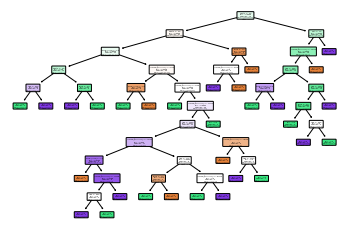

In [5]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =["L","H","N"] , filled = True , precision = 4, rounded = True)

<b>We can see that pruning won't work as most of the nodes here have two divisions and more than one leaf. However,a more concrete proof is shown in the next cell.</b>

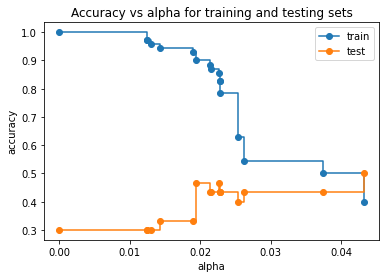

In [6]:
#The code below checks if pruning the data will help get better results. This is done by using the complexity pruning path module in python. 
#We set different ccp_alpha values in the Treeclassifier and check the accuracy of the classifier in each case.

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<b>THE ANSWER

The error of the classification tree without any parameters came out to be: 73.33%
The accuracy of the classification tree came out to be: 26.66%.

The low accuracy could be due to overfitting of the data. 

However,as shown in the plot above, pruning the data also doesn't help the classification tree. This is seen by an almost constant accuracy of 26.66%, no matter what the ccp alpha is. CCP alpha is 0 when no pruning is done. Therefore pruning does not improve the accuracy by a lot, it does so by merely 2-3% at an alpha of 0.02.</b>
